In [1]:
import graphlab
import math
import random
import numpy
from matplotlib import pyplot as plt
% matplotlib inline

This non-commercial license of GraphLab Create for academic use is assigned to msajjad@leomail.tamuc.edu and will expire on December 31, 2018.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1516736159.log


In [4]:
random.seed(98103)
n = 30
x = graphlab.SArray([random.random() for i in range(n)]).sort()

In [5]:
y = x.apply(lambda x: math.sin(4*x))

In [6]:
random.seed(1)
e = graphlab.SArray([random.gauss(0,1.0/3.0) for i in range(n)])
y = y+e

In [7]:
data = graphlab.SFrame({'X1':x,'Y':y})
data

X1,Y
0.0395789449501,0.587050191026
0.0415680996791,0.648655851372
0.0724319480801,0.307803309485
0.150289044622,0.310748447417
0.161334144502,0.237409625496
0.191956312795,0.705017157224
0.232833917145,0.461716676992
0.259900980166,0.383260507851
0.380145814869,1.06517691429
0.432444723508,1.03184706949


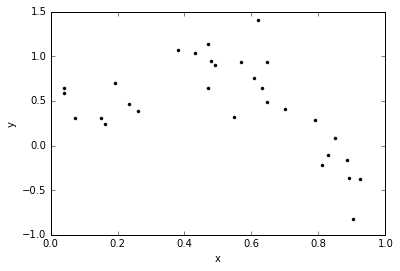

In [8]:
def plot_data(data):
    plt.plot(data['X1'],data['Y'],'k.')
    plt.xlabel('x')
    plt.ylabel('y')
plot_data(data)

In [18]:
def polynomial_features(data,deg):
    data_copy = data.copy()
    
  
    for i in range(1,deg):
        data_copy['X'+str(i+1)] = data_copy['X'+str(i)]* data_copy['X1']
    return data_copy


In [19]:
def polynomial_regression(data,deg):
    model = graphlab.linear_regression.create(polynomial_feature(data,deg),
                                             target = 'Y',
                                             l2_penalty = 0.,
                                             l1_penalty = 0.,
                                              validation_set = None,
                                              verbose = False
                                             )
    return model


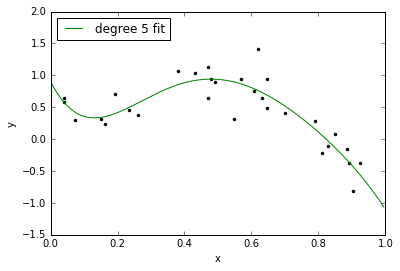

In [20]:
def plot_poly_prediction(data,model):
    plot_data(data)
    deg = len(model.coefficients['value'])-1
    x_pred = graphlab.SFrame({'X1':[i/200.0 for i in range(200)]})
    y_pred = model.predict(polynomial_features(x_pred,deg))
    
    # plot predictions
    plt.plot(x_pred['X1'], y_pred, 'g-', label='degree ' + str(deg) + ' fit')
    plt.legend(loc='upper left')
    plt.axis([0,1,-1.5,2])
plot_poly_prediction(data,polynomial_regression(data,5))

In [22]:
def print_coefficients(model):    
    # Get the degree of the polynomial
    deg = len(model.coefficients['value'])-1

    # Get learned parameters as a list
    w = list(model.coefficients['value'])

    # Numpy has a nifty function to print out polynomials in a pretty way
    # (We'll use it, but it needs the parameters in the reverse order)
    print 'Learned polynomial for degree ' + str(deg) + ':'
    w.reverse()
    print numpy.poly1d(w)
print_coefficients(polynomial_regression(data,5))

Learned polynomial for degree 5:
        5         4       3         2
-32.37 x + 101.8 x - 121 x + 59.93 x - 10.34 x + 0.9031


In [38]:
def get_pol(data,deg):
    model = polynomial_regression(data,deg)
    print_coefficients(model)
    print '\n'
    plt.figure()
    plot_poly_prediction(data,model)


Learned polynomial for degree 2:
        2
-5.129 x + 4.147 x + 0.07471




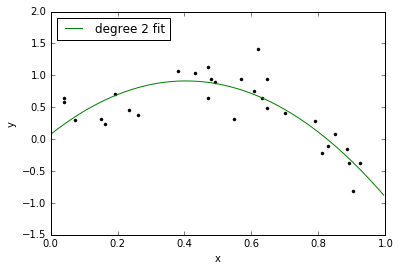

In [39]:
get_pol(data,2)

Learned polynomial for degree 4:
       4         3         2
23.87 x - 53.82 x + 35.23 x - 6.828 x + 0.7755


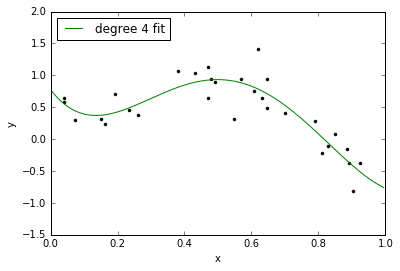

In [25]:
get_pol(data,4)

Learned polynomial for degree 1:
 
-0.846 x + 0.8961


Learned polynomial for degree 2:
        2
-5.129 x + 4.147 x + 0.07471


Learned polynomial for degree 3:
        3         2
-8.504 x + 7.392 x - 0.7994 x + 0.468


Learned polynomial for degree 4:
       4         3         2
23.87 x - 53.82 x + 35.23 x - 6.828 x + 0.7755


Learned polynomial for degree 5:
        5         4       3         2
-32.37 x + 101.8 x - 121 x + 59.93 x - 10.34 x + 0.9031


Learned polynomial for degree 6:
       6         5         4         3         2
223.4 x - 693.6 x + 852.8 x - 528.8 x + 166.8 x - 22.11 x + 1.262


Learned polynomial for degree 7:
       7         6         5         4       3         2
84.71 x - 61.65 x - 310.8 x + 591.3 x - 433 x + 148.6 x - 20.55 x + 1.22


Learned polynomial for degree 8:
      8        7        6        5        4       3         2
-889 x + 3565 x - 5680 x + 4513 x - 1776 x + 231 x + 48.17 x - 13.41 x + 1.053


Learned polynomial for degree 9:
            9 

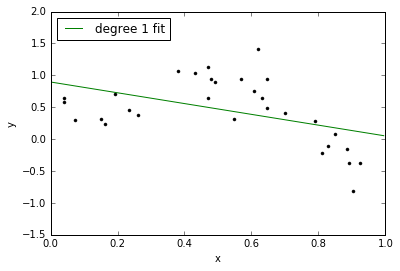

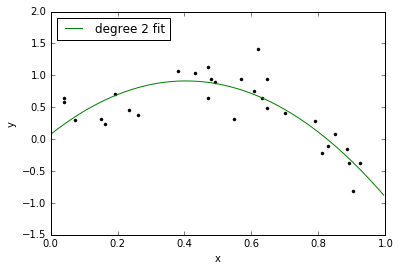

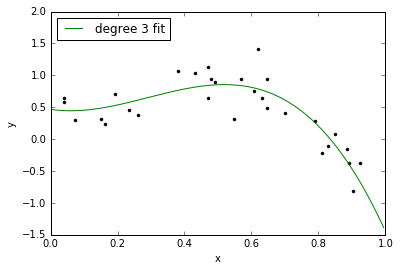

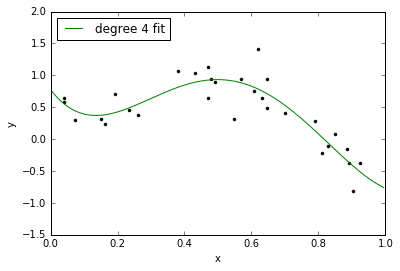

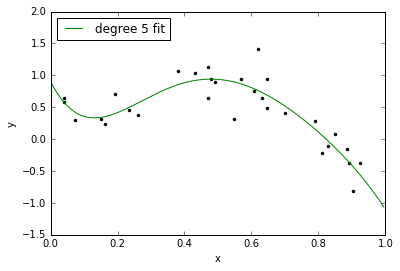

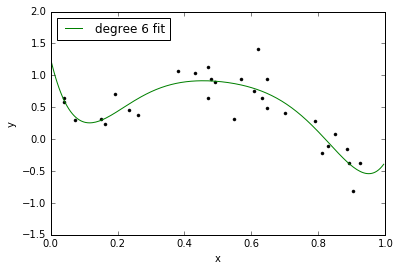

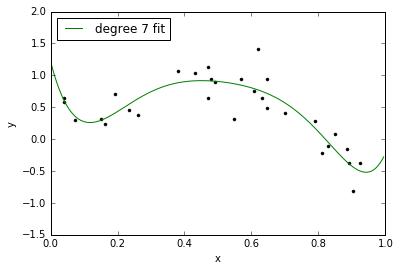

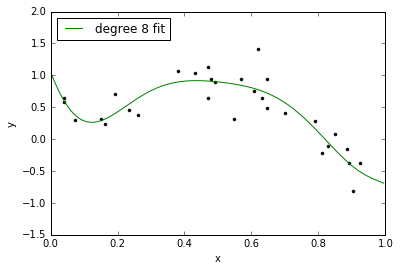

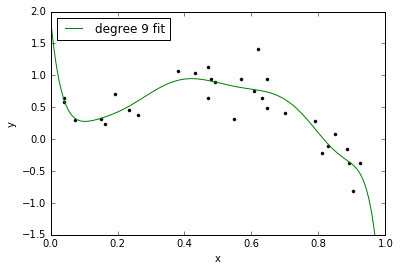

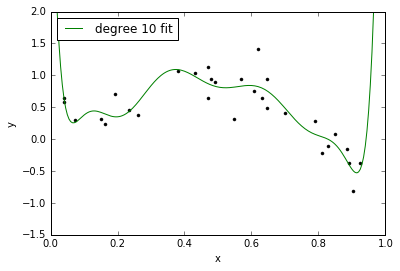

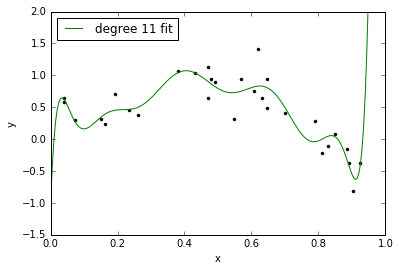

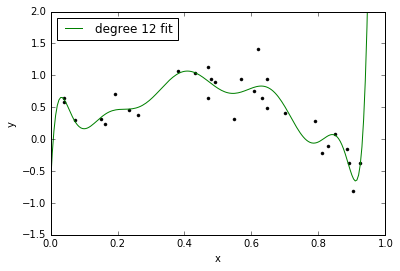

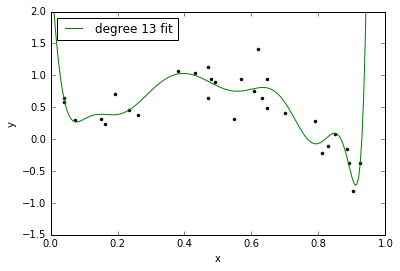

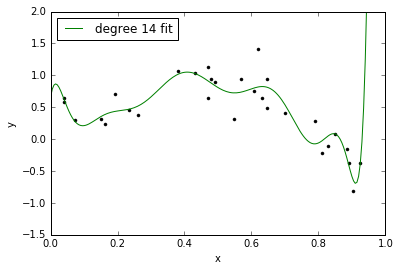

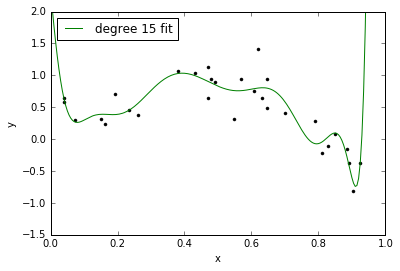

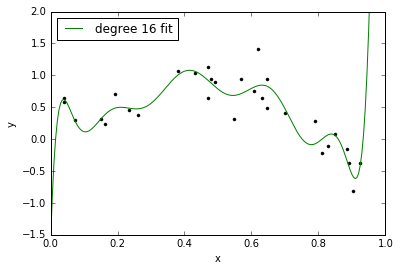

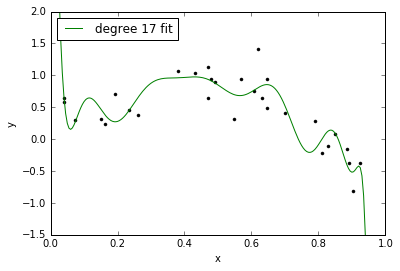

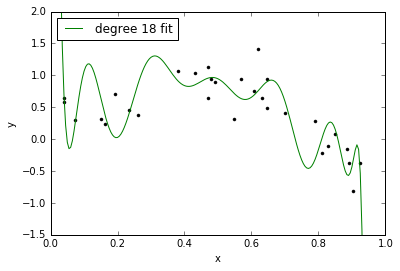

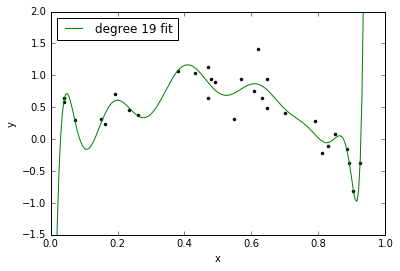

In [40]:
for i in range(1,20):
    get_pol(data,i)

In [27]:
def polynomial_ridge_regression(data, deg, l2_penalty):
    model = graphlab.linear_regression.create(polynomial_features(data,deg), 
                                              target='Y', l2_penalty=l2_penalty,
                                              validation_set=None,verbose=False)
    return model

In [28]:
model = polynomial_ridge_regression(data, deg=16, l2_penalty=1e-25)
print_coefficients(model)

Learned polynomial for degree 16:
            16             15             14            13
-4.537e+05 x  + 1.129e+06 x  + 4.821e+05 x  - 3.81e+06 x 
              12             11             10             9
 + 3.536e+06 x  + 5.753e+04 x  - 1.796e+06 x  + 2.178e+06 x
              8             7            6             5             4
 - 3.662e+06 x + 4.442e+06 x - 3.13e+06 x + 1.317e+06 x - 3.356e+05 x
             3        2
 + 5.06e+04 x - 4183 x + 160.8 x - 1.621


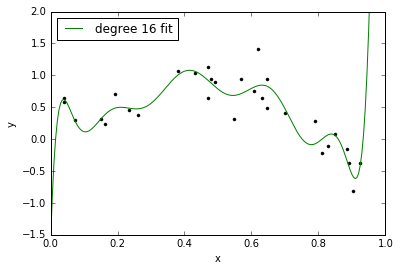

In [30]:
plot_poly_prediction(data,model)

In [36]:
def get_pols(data,deg,l2):
    model = polynomial_ridge_regression(data,deg,l2)
    print_coefficients(model)
    print 'lambda = %.2e' % l2
    print '\n'
    plt.figure()
    plot_poly_prediction(data,model)
    plt.title('Ridge, lambda = %.2e' % l2)


Learned polynomial for degree 16:
            16             15             14            13
-4.537e+05 x  + 1.129e+06 x  + 4.821e+05 x  - 3.81e+06 x 
              12             11             10             9
 + 3.536e+06 x  + 5.753e+04 x  - 1.796e+06 x  + 2.178e+06 x
              8             7            6             5             4
 - 3.662e+06 x + 4.442e+06 x - 3.13e+06 x + 1.317e+06 x - 3.356e+05 x
             3        2
 + 5.06e+04 x - 4183 x + 160.8 x - 1.621
lambda = 1.00e-25


Learned polynomial for degree 16:
           16             15             14             13
4.975e+04 x  - 7.821e+04 x  - 2.265e+04 x  + 3.949e+04 x 
              12        11             10             9             8
 + 4.366e+04 x  + 3074 x  - 3.332e+04 x  - 2.786e+04 x + 1.032e+04 x
              7        6             5             4        3         2
 + 2.962e+04 x - 1440 x - 2.597e+04 x + 1.839e+04 x - 5596 x + 866.1 x - 65.19 x + 2.159
lambda = 1.00e-10


Learned polynomial for degree 1

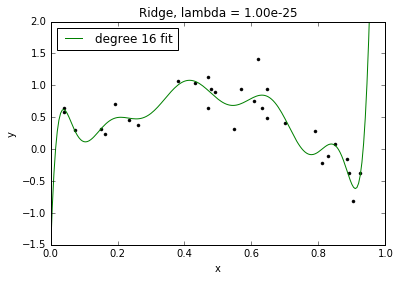

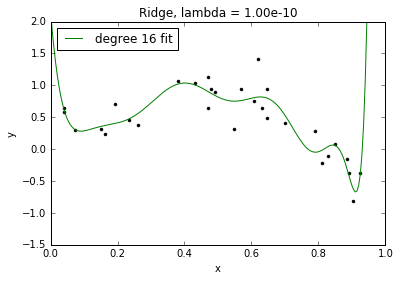

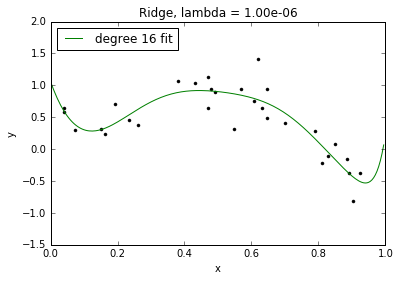

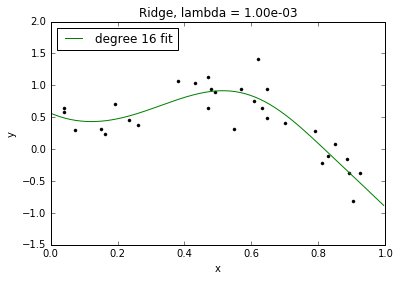

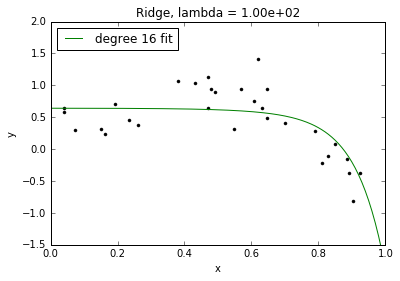

In [37]:
for i in [1e-25, 1e-10, 1e-6, 1e-3, 1e2]:
    get_pols(data,16,i)

In [41]:
# LOO cross validation -- return the average MSE
def loo(data, deg, l2_penalty_values):
    # Create polynomial features
    data = polynomial_features(data, deg)
    
    # Create as many folds for cross validatation as number of data points
    num_folds = len(data)
    folds = graphlab.cross_validation.KFold(data,num_folds)
    
    # for each value of l2_penalty, fit a model for each fold and compute average MSE
    l2_penalty_mse = []
    min_mse = None
    best_l2_penalty = None
    for l2_penalty in l2_penalty_values:
        next_mse = 0.0
        for train_set, validation_set in folds:
            # train model
            model = graphlab.linear_regression.create(train_set,target='Y', 
                                                      l2_penalty=l2_penalty,
                                                      validation_set=None,verbose=False)
            
            # predict on validation set 
            y_test_predicted = model.predict(validation_set)
            # compute squared error
            next_mse += ((y_test_predicted-validation_set['Y'])**2).sum()
        
        # save squared error in list of MSE for each l2_penalty
        next_mse = next_mse/num_folds
        l2_penalty_mse.append(next_mse)
        if min_mse is None or next_mse < min_mse:
            min_mse = next_mse
            best_l2_penalty = l2_penalty
            
    return l2_penalty_mse,best_l2_penalty

In [42]:
loo(data,16,[1e-25, 1e-10, 1e-6, 1e-3, 1e2])

([0.799420532378089,
  0.1716921523266528,
  0.2322221212526823,
  0.1099786915294347,
  0.1198585764437455],
 0.001)

In [43]:
l2_penalty_values = numpy.logspace(-4, 10, num=10)
l2_penalty_mse,best_l2_penalty = loo(data, 16, l2_penalty_values)

In [48]:
print(l2_penalty_values)

[  1.00000000e-04   3.59381366e-03   1.29154967e-01   4.64158883e+00
   1.66810054e+02   5.99484250e+03   2.15443469e+05   7.74263683e+06
   2.78255940e+08   1.00000000e+10]


In [45]:
print(best_l2_penalty)

0.129154966501


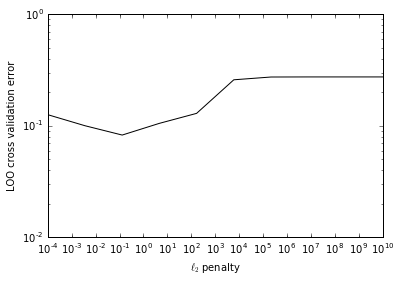

In [49]:
plt.plot(l2_penalty_values,l2_penalty_mse,'k-')
plt.xlabel('$\ell_2$ penalty')
plt.ylabel('LOO cross validation error')
plt.xscale('log')
plt.yscale('log')

In [50]:
model = polynomial_ridge_regression(data, deg=16, l2_penalty=best_l2_penalty)
print_coefficients(model)


Learned polynomial for degree 16:
       16         15          14          13          12           11
1.345 x  + 1.141 x  + 0.9069 x  + 0.6447 x  + 0.3569 x  + 0.04947 x 
           10          9          8         7         6         5
 - 0.2683 x  - 0.5821 x - 0.8701 x - 1.099 x - 1.216 x - 1.145 x
           4           3          2
 - 0.7837 x - 0.07406 x + 0.7614 x + 0.7703 x + 0.3918


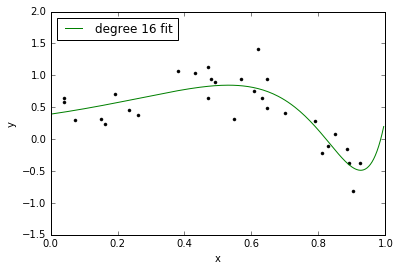

In [52]:
plot_poly_prediction(data,model)

In [53]:
def polynomial_lasso_regression(data, deg, l1_penalty):
    model = graphlab.linear_regression.create(polynomial_features(data,deg), 
                                              target='Y', l2_penalty=0.,
                                              l1_penalty=l1_penalty,
                                              validation_set=None, 
                                              solver='fista', verbose=False,
                                              max_iterations=3000, convergence_threshold=1e-10)
    return model

l1_penalty = 1.000000e-04
number of nonzeros = 17
Learned polynomial for degree 16:
       16        15         14         13         12         11
29.02 x  + 1.35 x  - 12.72 x  - 16.93 x  - 13.82 x  - 6.698 x 
          10         9         8         7         6         5
 + 1.407 x  + 8.939 x + 12.88 x + 11.44 x + 3.759 x - 8.062 x
          4         3         2
 - 16.28 x - 7.682 x + 17.86 x - 4.384 x + 0.685


l1_penalty = 1.000000e-02
number of nonzeros = 14
Learned polynomial for degree 16:
       16            15           11          10         9          8
-1.18 x  - 0.002249 x  + 0.08784 x  + 0.7393 x  + 3.829 x + 0.4766 x
           7             6          5         4             3         2
 + 0.1288 x - 0.0008621 x - 0.6146 x - 10.11 x - 0.0002693 x + 6.686 x - 1.28 x + 0.5056


l1_penalty = 1.000000e-01
number of nonzeros = 5
Learned polynomial for degree 16:
      16         6         5
2.21 x  - 1.002 x - 2.962 x + 1.216 x + 0.3473


l1_penalty = 1.000000e+01
number o

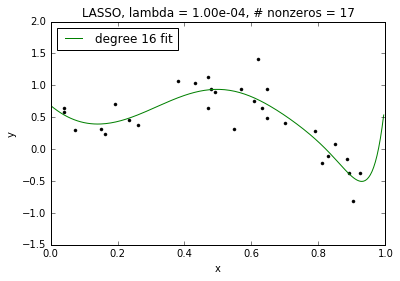

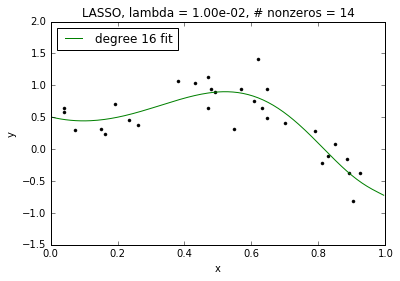

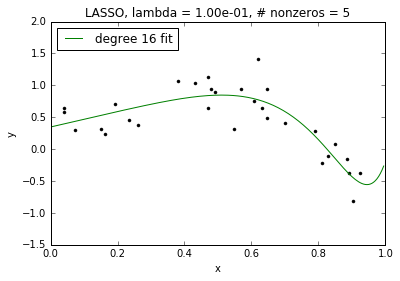

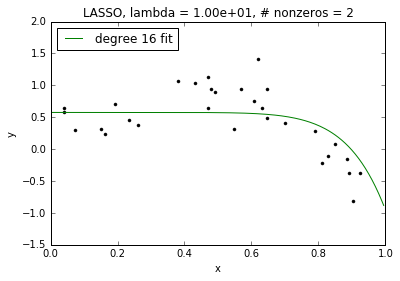

In [55]:
for l1_penalty in [0.0001, 0.01, 0.1, 10]:
    model = polynomial_lasso_regression(data, deg=16, l1_penalty=l1_penalty)
    print 'l1_penalty = %e' % l1_penalty
    print 'number of nonzeros = %d' % (model.coefficients['value']).nnz()
    print_coefficients(model)
    print '\n'
    plt.figure()
    plot_poly_prediction(data,model)
    plt.title('LASSO, lambda = %.2e, # nonzeros = %d' % (l1_penalty, (model.coefficients['value']).nnz()))